In [137]:
import numpy as np
from astropy.table import Table, setdiff, join
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u


# Load cl1018 in v7.0

In [138]:
v7 = Table().read('../catalogs/ediscs_v7.0/cl1018_catalog_v7.0.fits')
v7['Rauto'] = 23.9 - 2.5*np.log10(v7['fRauto'])
v7 = v7.filled(99)

/Users/matthewkirby/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


# Load cl1018 in v5.6

In [139]:
v5all = Table().read('../oldcode/galactic_evolution/catalog/megacat.v5.6.dat', format='ascii.fast_no_header')

In [140]:
v5all.rename_column('col1', 'field')
v5all.rename_column('col2', 'ids')
v5all.rename_column('col3', 'ra')
v5all.rename_column('col4', 'dec')
v5all.rename_column('col19', 'Rauto')
v5all.rename_column('col23', 'Q')

In [141]:
v5 = v5all[np.where(v5all['field']=='cl1018-12')]

In [142]:
#for i in range(len(v5)):
#    if v5['ids'][i][3] == '_':
#        v5['ids'][i] = v5['ids'][i][:8]+'-'+v5['ids'][i][9:12]+str(int(v5['ids'][i][12:]))
#    elif v5['ids'][i][4] == '_':
#        v5['ids'][i] = 'WFI_1018-12_'+str(int(v5['ids'][i][13:]))

In [143]:
print(len(v5), len(v5[np.where((v5['Rauto'] < 22.6) & (v5['Q'] == 4))]))

30333 729


# Find the rows that aren't in v7.0

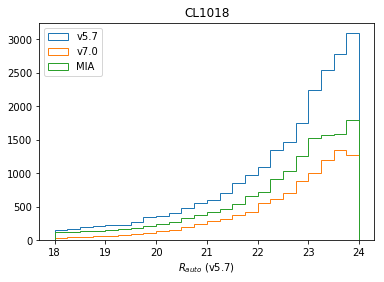

In [144]:
hist_edges = np.arange(18., 24.1, 0.25)
plt.hist(v5['Rauto'], bins=hist_edges, histtype='step', label='v5.7')
plt.hist(v7['Rauto'], bins=hist_edges, range=(18, 24.1), histtype='step', label='v7.0')
plt.hist(onlyv5['Rauto'], bins=hist_edges, histtype='step', label='MIA')

plt.xlabel(r'$R_{auto}$ (v5.7)')
plt.title('CL1018')
plt.legend(loc=2)
plt.savefig('plots/v5v7comparison.png', dpi=300)

# Look at how photometry changed for objects in both versions

In [145]:
v5coords = SkyCoord(ra=v5['ra']*u.degree, dec=v5['dec']*u.degree)
v7coords = SkyCoord(ra=v7['ra']*u.degree, dec=v7['dec']*u.degree)

In [146]:
# the nth element of idx is in the index in v7coords that best matches the nth element in v5coords
idx, d2d, d3d = v5coords.match_to_catalog_sky(v7coords)
# Only keep when slit-obj sep is less than 1 arcsecond
#close_idx = idx[np.where(d2d < 1.*u.arcsecond)[0]]

In [147]:
v5['Rauto_v7'] = v7['Rauto'][idx]
v5['v5v7_2dsep'] = d2d.arcsecond
v5['ra7'] = v7['ra'][idx]
v5['dec7'] = v7['dec'][idx]

In [148]:
matched = v5[np.where(v5['v5v7_2dsep'] <= 1.)]
onlyold = v5[np.where(v5['v5v7_2dsep'] > 1.0)]

In [149]:
print(len(matched), len(v5), len(onlyold), len(v7))

12464 30333 17869 12681


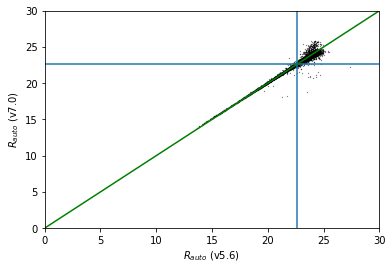

In [150]:
plt.plot(matched['Rauto'], matched['Rauto_v7'], '.k', ms=0.4)
plt.axvline(22.6)
plt.axhline(22.6)

pts = np.linspace(0, 30, 30)
plt.plot(pts, pts, '-g')

plt.xlim(0, 30)
plt.ylim(0, 30)

plt.xlabel(r'$R_{auto}$ (v5.6)')
plt.ylabel(r'$R_{auto}$ (v7.0)')

plt.savefig('plots/rauto_comparison.png', dpi=300)

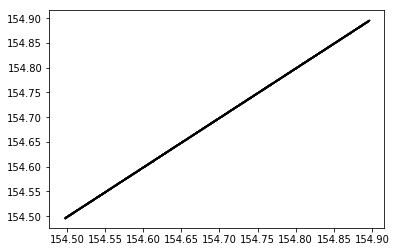

In [151]:
plt.plot(matched['ra'], matched['ra7'], '.k', ms=0.4)

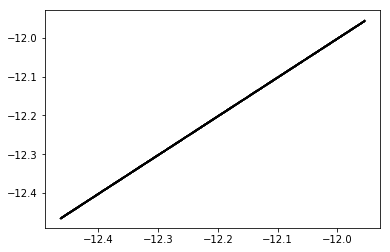

In [152]:
plt.plot(matched['dec'], matched['dec7'], '.k', ms=0.4)

# What were the mags of the obj that moved

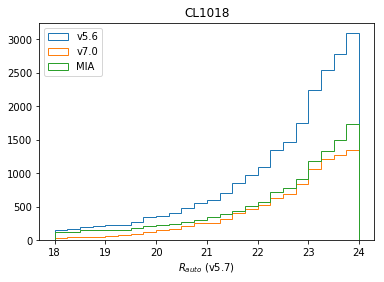

In [153]:
hist_edges = np.arange(18., 24.1, 0.25)
plt.hist(v5['Rauto'], bins=hist_edges, histtype='step', label='v5.6')
plt.hist(matched['Rauto'], bins=hist_edges, range=(18, 24.1), histtype='step', label='v7.0')
plt.hist(onlyold['Rauto'], bins=hist_edges, histtype='step', label='MIA')

plt.xlabel(r'$R_{auto}$ (v5.7)')
plt.title('CL1018')
plt.legend(loc=2)
plt.savefig('plots/v5v7comparison.png', dpi=300)

# Make a more useful plot of Rauto v Rauto

In [154]:
matched['dRauto'] = matched['Rauto'] - matched['Rauto_v7']

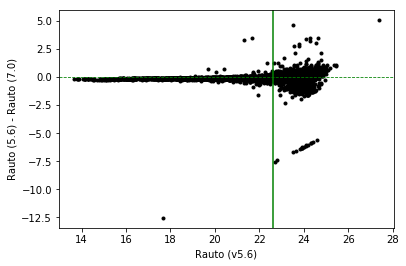

In [155]:
plt.plot(matched['Rauto'], matched['dRauto'], '.k')
plt.xlabel('Rauto (v5.6)')
plt.ylabel('Rauto (5.6) - Rauto (7.0)')
plt.axvline(22.6, color='g')
plt.axhline(0.0, linestyle='--', linewidth=0.8, color='g')
plt.savefig('plots/rauto_comparison.png', dpi=300)

# Load the old classifications

In [170]:
oldclass = Table().read('old_stuff/old_classifications.dat', format='ascii')
fullv7 = Table().read('../catalogs/personal_catalogs/slits_phot_zs_tester.csv', format='csv')

In [174]:
print(oldclass.colnames)

['cluster', 'name', 'EDisCSID', 'ra', 'dec', 'z', 'Q', 'rcl(mpc)', 'rcl(r200)', 'morph', 'weightQ4', 'weightQ3', 'weightQ2']


In [171]:
v7coords = SkyCoord(ra=fullv7['ra']*u.degree, dec=fullv7['dec']*u.degree)
classcoords = SkyCoord(ra=oldclass['ra']*u.degree, dec=oldclass['dec']*u.degree)

In [172]:
# the nth element of idx is in the index in v7coords that best matches the nth element in classcoords
idx, d2d, d3d = classcoords.match_to_catalog_sky(v7coords)
# Only keep when slit-obj sep is less than 1 arcsecond
#close_idx = idx[np.where(d2d < 1.*u.arcsecond)[0]]

In [190]:
closeoldclass = idx[np.where(d2d < 1.*u.arcsecond)]
print(len(oldclass), len(closeoldclass))

177 97


In [199]:
print(len(np.where(fullv7[idx]['Q'] == 4)[0]))

139


# ^ Lol shit